[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/spalkovits/REAKT2019_ML4OER_SPks/blob/master/REAKT2019_ML4OER_SPks.ipynb)

An online version of this talk can be found on Github:

**https://github.com/spalkovits/REAKT2019_ML4OER_SPks/blob/master/REAKT2019_ML4OER_SPks.ipynb**

If you like to follow along this talk click the Colab button above. It works best when you choose "Open in new tab" or "Open in new window".

This talk uses **Jupyter Notebooks**.

<center><img src="images/jupyter.png" width=400></center>

As the scope of this notebook is a talk the code will not be commented. Questions are very welcome. 

---
<center><img src="images/RWTH.jpg" width=600></center>

<h1 align="center"> Machine learning approaches for the prediction of oxygen evolution catalysts. </h1> 
<h1 align="center"> Dr. Stefan Palkovits </h1>
<h1 align="center"> <a href="stefan.palkovits@itmc.rwth-aachen.de">stefan.palkovits@itmc.rwth-aachen.de </a> </h1>

---

# Introduction

* Machine Learming (ML) and Artificial Intelligence (AI) are gathering more and more attention in Science and in Public. 

* Project like **AlphaGo** from Google help to improve the public visibility and to show the power of Machine Learning algorithms:

<center><img src="images/CZwBnptVIAAxglE.jpg" width=600></center>

Source: https://pbs.twimg.com/media/CZwBnptVIAAxglE.jpg

---

* Machine Learning is discussed often these days

* Right now it is hard to predict if this trend continues or if Machine Learning will vanish again and only stay for example for Internet applications

<center><img src="images/Emerging-Technology-Hype-Cycle-for-2017_Infographic_R6A.jpg" width=800></center>

Source: https://blogs.gartner.com/smarterwithgartner/files/2017/08/Emerging-Technology-Hype-Cycle-for-2017_Infographic_R6A.jpg

---

* Unfortunately there are many misconceptions about Machine Learning

<center><img src="images/machine_learning_2x.png" width=600></center>

Source: https://xkcd.com/1838/

---

# Machine Learning 101

## Traditional approach:

$$\Large \text{Input} + \text{Algorithm} \rightarrow \fbox{Computer} \rightarrow \text{Output}$$

## Machine Learning approach:

$$\Large \text{Input} + \text{Output} \rightarrow \fbox{Computer} \rightarrow \text{Algorithm}$$

---

# Fields of Machine Learning

<center><img src="images/kisspng-deep-learning-machine-learning-artificial-intellig-segmentation-5add57a3429e59.6693846415244553312729.png" width=900></center>

Source: https://de.kisspng.com/png-ubowb3/

---

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

%matplotlib inline

* In this work we will use several Machine Learning algorithms to predict the overpotential of water oxidation catalysts

* The models will be evaluated against each other

# Data visualisation and preprocessing

Two datasets were used:

* J. A. Haber, Y. Cai, S. Jung, C. Xiang, S. Mitrovic, J. Jin, A. T. Bell, J. M. Gregoire, Energy Environ. Sci., 2014, 7, 682–688, DOI: 10.1039/c3ee43683g

* J. A. Haber, C. Xiang, D. Guevarra, S. Jung, J. Jin, J. M. Gregoire, ChemElectroChem 2014, 1, 524 – 528, DOI: 10.1002/celc.201300229

In [2]:
url_full = 'https://raw.githubusercontent.com/spalkovits/ML_NiFeCoCe_talk/master/full_dataset.csv'
url_own = 'https://raw.githubusercontent.com/spalkovits/ML_NiFeCoCe_talk/master/own_dataset.csv'

In [3]:
NiFeCoCe_full = pd.read_csv(url_full)
NiFeCoCe_own = pd.read_csv(url_own)

In [4]:
NiFeCoCe_full.head()

,Ni,Fe,Co,Ce,Overpotential
0,1.000,0.000,0.000,0.0,441.0
1,0.969,0.031,0.000,0.0,426.0
2,0.969,0.000,0.031,0.0,423.0
3,0.929,0.071,0.000,0.0,420.0
4,0.929,0.031,0.031,0.0,422.0


---
## Visualization of the raw data

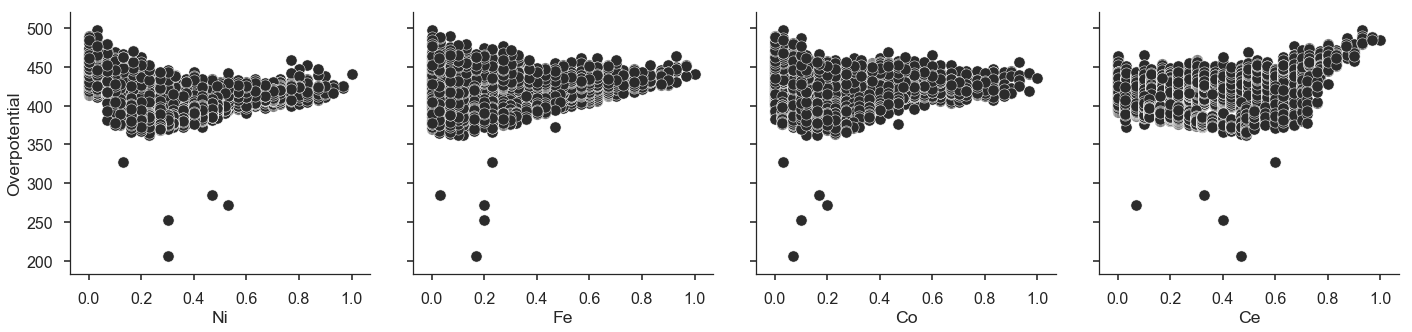

In [5]:
sns.set()
sns.set(style='ticks', context='poster', palette='Greys_r')

sns.pairplot(NiFeCoCe_full, size=5, x_vars=['Ni', 'Fe', 'Co', 'Ce'], y_vars=['Overpotential'], markers='o');

---

## Clustering with k-means algorithm and further visualization with the t-distributed Stochastic Neighbor Embedding (t-SNE) algorithm

In [6]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

k_ellbow = []

for E in range(20):
    E = E+1
    kmeans = KMeans(n_clusters=E)
    kmeans.fit(NiFeCoCe_full.loc[:,'Ni':'Ce'])
    score = kmeans.score(NiFeCoCe_full.loc[:,'Ni':'Ce'])
    k_ellbow.append(score)

k_cluster = KMeans(n_clusters=10)
k_cluster.fit(NiFeCoCe_full.loc[:,'Ni':'Ce'])
y_k_cluster = k_cluster.predict(NiFeCoCe_full.loc[:,'Ni':'Ce'])

tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000, init='pca')
tsne_result = tsne.fit_transform(NiFeCoCe_full.loc[:,'Ni':'Ce'])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 6074 samples in 0.005s...
[t-SNE] Computed neighbors for 6074 samples in 0.122s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6074
[t-SNE] Computed conditional probabilities for sample 2000 / 6074
[t-SNE] Computed conditional probabilities for sample 3000 / 6074
[t-SNE] Computed conditional probabilities for sample 4000 / 6074
[t-SNE] Computed conditional probabilities for sample 5000 / 6074
[t-SNE] Computed conditional probabilities for sample 6000 / 6074
[t-SNE] Computed conditional probabilities for sample 6074 / 6074
[t-SNE] Mean sigma: 0.044124
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.387932
[t-SNE] KL divergence after 1000 iterations: 1.350422


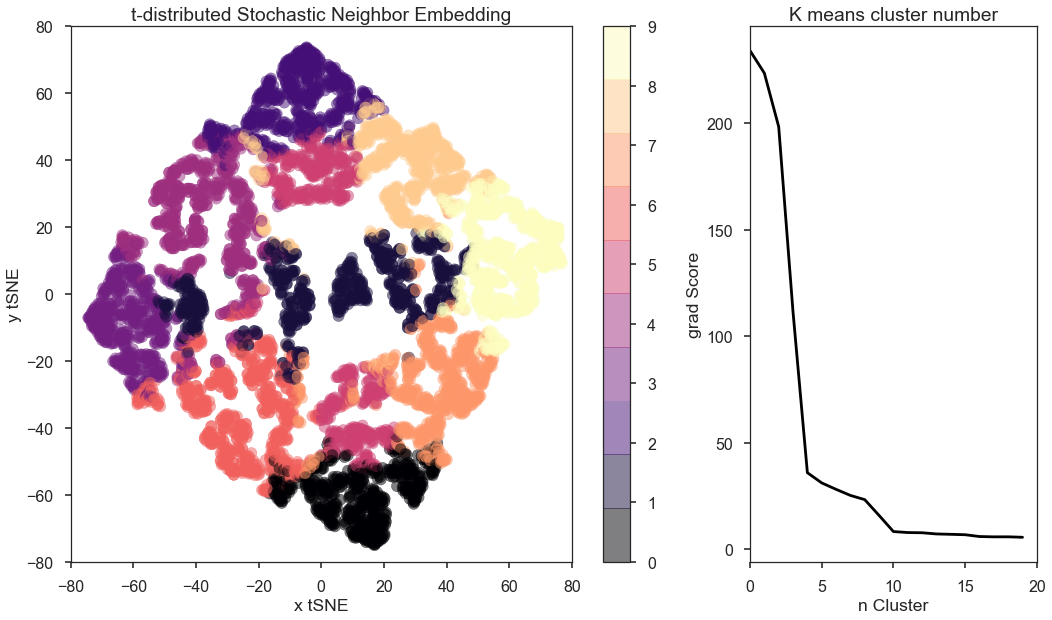

In [7]:
sns.set()
sns.set(style='ticks', context='poster')
plt.figure(figsize=(15,9))
grid = plt.GridSpec(1,3)
plt.subplot(grid[0,:2])
plt.xlim((-80,80))
plt.ylim((-80,80))

plt.title('t-distributed Stochastic Neighbor Embedding')
plt.xlabel('x tSNE')
plt.ylabel('y tSNE')

plt.scatter(tsne_result[:,0], tsne_result[:,1], c=y_k_cluster, marker='o',alpha=0.5, cmap=plt.cm.get_cmap('magma', 10))
plt.colorbar(ticks=np.arange(0,12))

plt.subplot(grid[0,2])
plt.xlim(0, 20)
plt.title('K means cluster number')
plt.xlabel('n Cluster')
plt.ylabel('grad Score')
plt.plot(np.gradient(k_ellbow), 'k')

plt.tight_layout();

---

## Sorting, splitting by overpotential and preprocessing for the Machine Learning algorithms

In [8]:
NiFeCoCe_new = NiFeCoCe_full.sort_values(by=['Overpotential'])

NiFeCoCe_small_OP = NiFeCoCe_new[NiFeCoCe_new['Overpotential']<380]
NiFeCoCe_large_OP = NiFeCoCe_new[NiFeCoCe_new['Overpotential']>=380]

print('Samples with a low overpotential: ', NiFeCoCe_small_OP.shape)
print('Samples with a high overpotential', NiFeCoCe_large_OP.shape)

Samples with a low overpotential:  (146, 5)
Samples with a high overpotential (5928, 5)


In [9]:
from sklearn.model_selection import train_test_split

X1_train, y1_test = train_test_split(NiFeCoCe_large_OP, test_size=0.3, random_state=42)
X2_train, y2_test = train_test_split(NiFeCoCe_small_OP, test_size=0.3, random_state=42)

NiFeCoCe_train = np.vstack((X1_train, X2_train))
NiFeCoCe_test = np.vstack((y1_test, y2_test))

print('Training samples: ', NiFeCoCe_train.shape)
print('Test samples: ', NiFeCoCe_test.shape)

Training samples:  (4251, 5)
Test samples:  (1823, 5)


In [10]:
np.random.seed(42)

order1 = np.argsort(np.random.random(NiFeCoCe_train[:,-1].shape))
order2 = np.argsort(np.random.random(NiFeCoCe_test[:,-1].shape))

NiFeCoCe_train = NiFeCoCe_train[order1]
NiFeCoCe_test = NiFeCoCe_test[order2]

In [11]:
train_data = NiFeCoCe_train[:,0:4]
train_label = NiFeCoCe_train[:,-1]/1000

test_data = NiFeCoCe_test[:,0:4]
test_label = NiFeCoCe_test[:,-1]/1000

---

# Artificial Neural Network Approach

* Neural Networks are state-of-the-art Machine Learning algorithms
* Features mark the inputs
* Targets are the outputs
* The neurons are connected by weights
* Each neuron has an additional activation function

<center><img src="images/network2.png" width=450></center>

In [12]:
import tensorflow as tf
from tensorflow import keras

/Users/palkovits/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [13]:
%%time

model = keras.Sequential()
model.add(keras.layers.Dense(6, activation=tf.nn.relu, input_shape=(train_data.shape[1],)))
model.add(keras.layers.Dense(6, activation=tf.nn.relu))
model.add(keras.layers.Dense(1))
    
optimizer = tf.keras.optimizers.RMSprop(lr=0.001)
    
model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
    
model.summary()
    
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

model.fit(train_data, train_label, epochs=500, validation_split=0.2, verbose=0, callbacks=[early_stop]);

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 30        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 79
Trainable params: 79
Non-trainable params: 0
_________________________________________________________________
CPU times: user 19 s, sys: 2.06 s, total: 21.1 s
Wall time: 9.44 s


## Metrics of the Artificial Neural Network

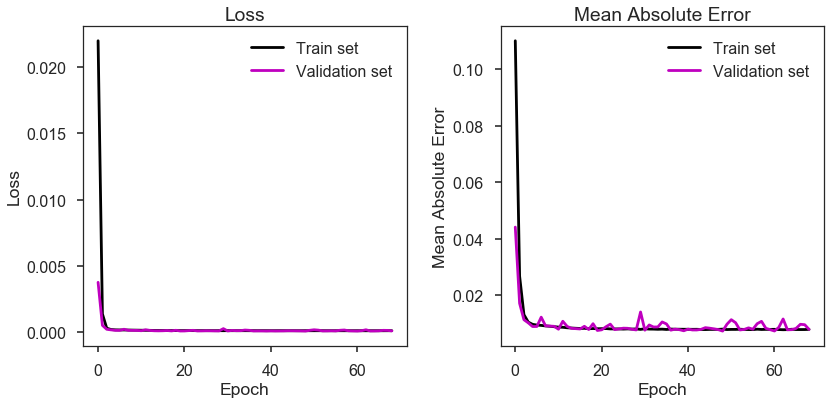

In [14]:
sns.set()
sns.set(style='ticks', context='poster', palette='magma')
plt.figure(figsize=(12,6))

plt.subplot(121)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(model.history.epoch, np.array(model.history.history['loss']), 'k',label='Train set')
plt.plot(model.history.epoch, np.array(model.history.history['val_loss']), 'm', label='Validation set')
plt.legend()

plt.subplot(122)
plt.title('Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.plot(model.history.epoch, np.array(model.history.history['mean_absolute_error']), 'k', label='Train set')
plt.plot(model.history.epoch, np.array(model.history.history['val_mean_absolute_error']), 'm', label='Validation set')
plt.legend()
         
plt.tight_layout()

---

# Support vector regression

In [15]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=10, gamma=10, epsilon=0.001)
y_svr = svr_rbf.fit(train_data, train_label)

---

# k-Nearest Neighbour regression

In [16]:
from sklearn import neighbors

model_knn = neighbors.KNeighborsRegressor(n_neighbors = 11)
model_knn.fit(train_data, train_label)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=11, p=2,
          weights='uniform')

---

# Calculating predictions

In [17]:
train_predictions = model.predict(train_data).flatten()
test_predictions = model.predict(test_data).flatten()

predict_own_data = model.predict(NiFeCoCe_own.loc[:,'Ni':'Ce']).flatten()

In [18]:
predict_svr_train = y_svr.predict(train_data)
predict_svr = y_svr.predict(test_data)

predict_own_svr = y_svr.predict(NiFeCoCe_own.loc[:,'Ni':'Ce'])

In [19]:
predict_knn_train=model_knn.predict(train_data)
predict_knn=model_knn.predict(test_data)

predict_own_knn=model_knn.predict(NiFeCoCe_own.loc[:,'Ni':'Ce'])

---

# Prediction overview

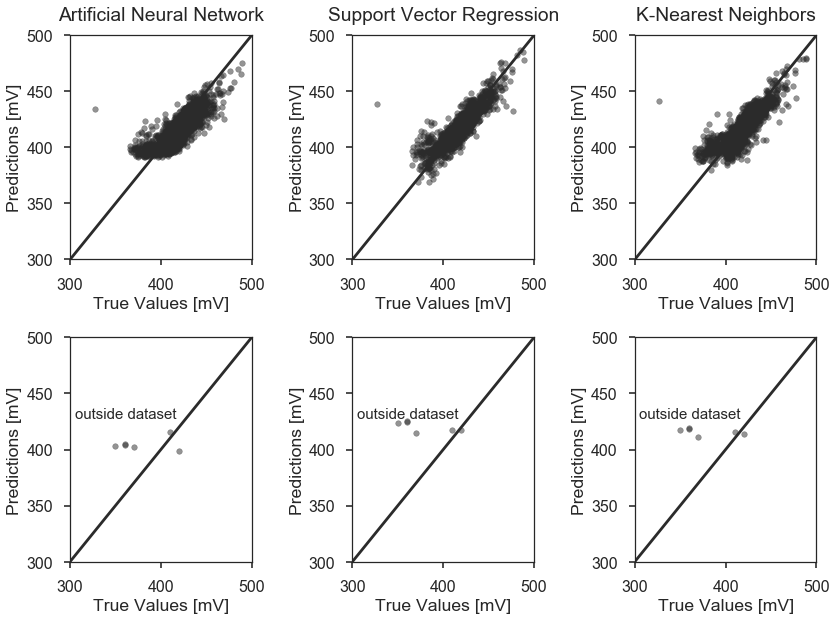

In [20]:
sns.set()
sns.set(style='ticks', context='poster', palette='Greys_r')
plt.figure(figsize=(12,9))

plt.subplot(231)
plt.xlim((300,500))
plt.ylim((300,500))
plt.title('Artificial Neural Network', pad=15)
plt.xlabel('True Values [mV]')
plt.ylabel('Predictions [mV]')
plt.scatter(test_label*1000, test_predictions*1000, marker='.', alpha=0.5)
plt.plot([-1000, 1000], [-1000, 1000])

plt.subplot(232)
plt.xlim((300,500))
plt.ylim((300,500))
plt.title('Support Vector Regression', pad=15)
plt.xlabel('True Values [mV]')
plt.ylabel('Predictions [mV]')
plt.scatter(test_label*1000, predict_svr*1000, marker='.', alpha=0.5)
plt.plot([-1000, 1000], [-1000, 1000])

plt.subplot(233)
plt.xlim((300,500))
plt.ylim((300,500))
plt.title('K-Nearest Neighbors', pad=15)
plt.xlabel('True Values [mV]')
plt.ylabel('Predictions [mV]')
plt.scatter(test_label*1000, predict_knn*1000, marker='.', alpha=0.5)

plt.plot([-1000, 1000], [-1000, 1000])

plt.subplot(234)
plt.xlim((300,500))
plt.ylim((300,500))
plt.xlabel('True Values [mV]')
plt.ylabel('Predictions [mV]')
plt.scatter(NiFeCoCe_own.loc[:,'Overpotential'], predict_own_data*1000, marker='.', alpha=0.5)
plt.annotate('outside dataset', xy=(305,428), size=15)
plt.plot([-1000, 1000], [-1000, 1000])

plt.subplot(235)
plt.xlim((300,500))
plt.ylim((300,500))
plt.xlabel('True Values [mV]')
plt.ylabel('Predictions [mV]')
plt.scatter(NiFeCoCe_own.loc[:,'Overpotential'], predict_own_svr*1000, marker='.', alpha=0.5)
plt.annotate('outside dataset', xy=(305,428), size=15)
plt.plot([-1000, 1000], [-1000, 1000])

plt.subplot(236)
plt.xlim((300,500))
plt.ylim((300,500))
plt.xlabel('True Values [mV]')
plt.ylabel('Predictions [mV]')
plt.scatter(NiFeCoCe_own.loc[:,'Overpotential'], predict_own_knn*1000, marker='.', alpha=0.5)
plt.annotate('outside dataset', xy=(305,428), size=15)
plt.plot([-1000, 1000], [-1000, 1000])

plt.tight_layout()

---

# Calculating overall metrics

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse_ann = mean_squared_error(test_label,test_predictions)
mse_ann_train = mean_squared_error(train_label,train_predictions)

mse_svr = mean_squared_error(test_label,predict_svr)
mse_svr_train = mean_squared_error(train_label,predict_svr_train)

mse_knn = mean_squared_error(test_label,predict_knn)
mse_knn_train = mean_squared_error(train_label,predict_knn_train)

r2_ann_train = r2_score(train_label,train_predictions)
r2_ann = r2_score(test_label,test_predictions)

r2_svr_train = r2_score(train_label,predict_svr_train)
r2_svr = r2_score(test_label,predict_svr)

r2_knn_train = r2_score(train_label,predict_knn_train)
r2_knn = r2_score(test_label,predict_knn)

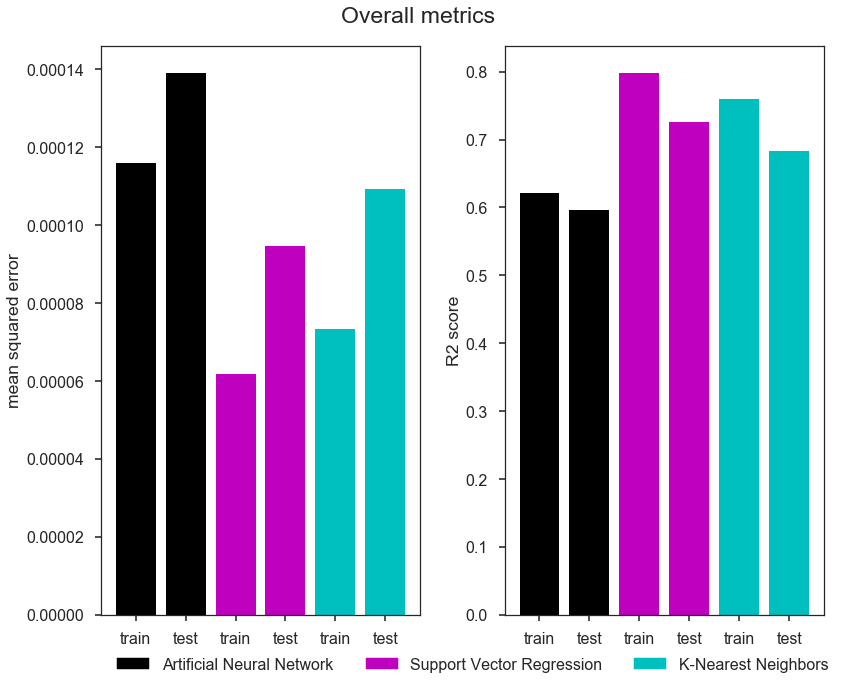

In [22]:
sns.set()
sns.set(style='ticks', context='poster', palette='magma')

ann = mpatches.Patch(color='k', label='Artificial Neural Network')
svr = mpatches.Patch(color='m', label='Support Vector Regression')
knn = mpatches.Patch(color='c', label='K-Nearest Neighbors')

names = ['train', 'test', 'train', 'test', 'train', 'test']
pos = range(len(names))
colors = ['k', 'k', 'm', 'm', 'c', 'c']
rotation = 0

plt.figure(figsize=(12,9))
plt.suptitle('Overall metrics', y=1.02)
plt.subplot(121)
plt.bar(pos, [mse_ann_train, mse_ann, mse_svr_train, mse_svr,mse_knn_train, mse_knn], color=colors)
plt.xticks(pos, names,rotation=rotation)
plt.ylabel('mean squared error')

plt.subplot(122)
plt.bar(pos, [r2_ann_train,r2_ann, r2_svr_train, r2_svr,r2_knn_train, r2_knn], color=colors)
plt.xticks(pos, names, rotation=rotation)
plt.ylabel('R2 score')

plt.tight_layout()
plt.legend(loc='upper center', handles=[ann, svr, knn], ncol=3, bbox_to_anchor=(-0.1, -0.05));

---

# Summary

* Machine Learning can be used to predict the overpotential of literature datasets and catalysts from our own work

* Simple models like Support Vector Regression are able to outperform more complex Artificial Neural Networks

* Visualization, preprocessing of data and tuning of hyperparameters are important tasks for Machine Learning

---

# Thank you for your attention

<center><img src="http://www.itmc.rwth-aachen.de/global/show_picture.asp?id=aaaaaaaaaazyrfn" width=600></center>